In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("/content/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder

train_categorical1 = data['sex']
train_categorical2 = data['smoker']
train_categorical3 = data['region']

label_encoder1 = LabelEncoder()
train_encoded1 = label_encoder1.fit_transform(train_categorical1)
train_encoded2 = label_encoder1.fit_transform(train_categorical2)
train_encoded3 = label_encoder1.fit_transform(train_categorical3)

data['Sex_e'] = train_encoded1
data['smoker_e'] = train_encoded2
data['region_e'] = train_encoded3


In [6]:
data.head(10)

,age,sex,bmi,children,smoker,region,expenses,Sex_e,smoker_e,region_e
0,19,female,27.9,0,yes,southwest,16884.92,0,1,3
1,18,male,33.8,1,no,southeast,1725.55,1,0,2
2,28,male,33.0,3,no,southeast,4449.46,1,0,2
3,33,male,22.7,0,no,northwest,21984.47,1,0,1
4,32,male,28.9,0,no,northwest,3866.86,1,0,1
5,31,female,25.7,0,no,southeast,3756.62,0,0,2
6,46,female,33.4,1,no,southeast,8240.59,0,0,2
7,37,female,27.7,3,no,northwest,7281.51,0,0,1
8,37,male,29.8,2,no,northeast,6406.41,1,0,0
9,60,female,25.8,0,no,northwest,28923.14,0,0,1


In [7]:
data.drop('smoker',axis=1,inplace= True)
data.drop('region',axis=1,inplace= True)
data.drop('sex',axis=1,inplace= True)


In [8]:
data.head()

,age,bmi,children,expenses,Sex_e,smoker_e,region_e
0,19,27.9,0,16884.92,0,1,3
1,18,33.8,1,1725.55,1,0,2
2,28,33.0,3,4449.46,1,0,2
3,33,22.7,0,21984.47,1,0,1
4,32,28.9,0,3866.86,1,0,1


In [9]:
y = data.loc[:,'expenses']

In [10]:
data.drop('expenses',axis=1,inplace= True)


In [11]:
y.head(10)

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
5     3756.62
6     8240.59
7     7281.51
8     6406.41
9    28923.14
Name: expenses, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,y, test_size=0.3, random_state=42)

In [13]:
Y_train.head()

332    13429.04
355    24603.05
138    27322.73
381    42303.69
292    42112.24
Name: expenses, dtype: float64

In [14]:
Y_train.head()

332    13429.04
355    24603.05
138    27322.73
381    42303.69
292    42112.24
Name: expenses, dtype: float64

In [15]:
X_test

,age,bmi,children,Sex_e,smoker_e,region_e
764,45,25.2,2,0,0,0
887,36,30.0,0,0,0,1
890,64,26.9,0,0,1,1
1293,46,25.7,3,1,0,1
259,19,31.9,0,1,1,1
...,...,...,...,...,...,...
701,50,44.7,0,0,0,0
672,36,29.7,0,1,0,2
1163,18,28.2,0,0,0,0
1103,58,36.1,0,1,0,2


In [16]:
from sklearn.preprocessing import StandardScaler
data_scale_list=['age','bmi','children']
scaler = StandardScaler()
scaler.fit(X_train[data_scale_list])
X_train[data_scale_list] = scaler.transform(X_train[data_scale_list])
X_test[data_scale_list] = scaler.transform(X_test[data_scale_list])


In [17]:
X_test=pd.DataFrame(X_test)

In [18]:
X_test

,age,bmi,children,Sex_e,smoker_e,region_e
764,0.411035,-0.891645,0.735182,0,0,0
887,-0.226519,-0.090737,-0.915011,0,0,1
890,1.756983,-0.607990,-0.915011,0,1,1
1293,0.481874,-0.808217,1.560279,1,0,1
259,-1.430789,0.226289,-0.915011,1,1,1
...,...,...,...,...,...,...
701,0.765232,2.362045,-0.915011,0,0,0
672,-0.226519,-0.140794,-0.915011,1,0,2
1163,-1.501628,-0.391077,-0.915011,0,0,0
1103,1.331947,0.927084,-0.915011,1,0,2


In [19]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, Y_train)

LinearRegression()

In [20]:
model1_pred=model1.predict(X_test)

In [21]:
from sklearn.model_selection import cross_val_score
cv_acc1 = cross_val_score(model1, data, y, cv=5, scoring=None)
cv_acc1

array([0.76123664, 0.70840336, 0.77787785, 0.73369063, 0.7551539 ])

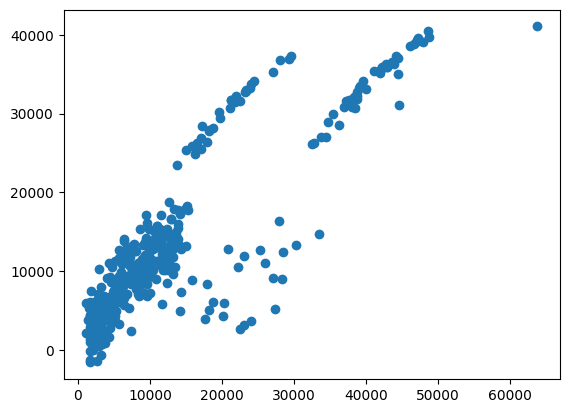

In [22]:
plt.scatter(Y_test,model1_pred)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
print (mean_squared_error(Y_test,model1_pred))

33802383.55494205


In [25]:
print (mean_absolute_error(Y_test,model1_pred))

4154.700387257935


In [26]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,model1_pred)
print(score)

0.7694626233326284


In [27]:
1- (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)


0.7659607897629974

In [28]:
df=pd.DataFrame(data={"abs_val":Y_test,"pred_val":model1_pred})

In [29]:

df["diff"]=df["pred_val"]-df["abs_val"]

In [30]:
df

,abs_val,pred_val,diff
764,9095.07,8938.656851,-156.413149
887,5272.18,7062.787354,1790.607354
890,29330.98,36939.995651,7609.015651
1293,9301.89,9580.973660,279.083660
259,33750.29,27000.270665,-6750.019335
...,...,...,...
701,9541.70,16117.004611,6575.304611
672,4399.73,6743.155522,2343.425522
1163,2200.83,2059.594911,-141.235089
1103,11363.28,14704.031818,3340.751818


In [31]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators = 10, random_state = 0)
model2.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [32]:
model2_pred=model2.predict(X_test)

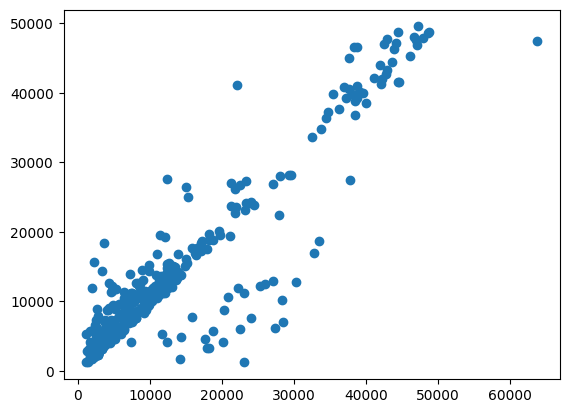

In [33]:
plt.scatter(Y_test,model2_pred)

In [34]:
model2_pred

array([ 8648.732,  5248.454, 28217.183, 10401.515, 34760.673, 11326.71 ,
        2169.931, 13843.832,  7316.745, 10056.418, 19635.569,  7337.309,
        6597.286, 45248.326, 48609.387, 47238.966, 10077.727, 43330.925,
        8637.507, 26193.474,  4507.217, 11207.382,  2828.05 ,  2295.773,
       11447.136, 10499.977, 13001.253,  5768.681, 10572.605,  5333.188,
        7747.887, 11890.465,  3446.067,  9683.82 ,  2772.537, 10425.27 ,
        2265.458,  8413.677, 24159.963, 39197.433, 11485.804,  8868.661,
       11280.674, 13677.587,  5320.585, 15324.859, 18362.882,  3963.829,
       41315.69 ,  4651.498, 13915.174,  2810.784,  7028.135,  1805.456,
       11046.422, 12163.688,  5262.911, 40942.695, 12952.026, 11577.968,
       13620.622,  9137.304, 22387.634,  7598.886, 11184.275,  8716.922,
       17574.7  , 12523.541,  4453.628,  1696.382,  8080.088,  8775.155,
       11051.142,  8547.827,  7450.583,  4960.001,  9461.69 , 12974.297,
        4219.797,  8307.22 ,  1213.335, 28094.828, 

In [35]:
from sklearn.model_selection import cross_val_score
cv_acc1 = cross_val_score(model2, data, y, cv=5, scoring=None)
cv_acc1

array([0.8444981 , 0.76452435, 0.85794085, 0.82178062, 0.84345782])

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
print (mean_squared_error(Y_test,model2_pred))

23011740.841623716


In [38]:
from sklearn.metrics import r2_score
score2=r2_score(Y_test,model2_pred)
print(score2)

0.8430564413437134


In [39]:
1- (1-score2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)


0.8406724885539976

In [40]:
df1=pd.DataFrame(data={"abs_val":Y_test,"pred_val":model2_pred})
df1["diff"]=df1["pred_val"]-df1["abs_val"]

In [41]:
df1

,abs_val,pred_val,diff
764,9095.07,8648.732,-446.338
887,5272.18,5248.454,-23.726
890,29330.98,28217.183,-1113.797
1293,9301.89,10401.515,1099.625
259,33750.29,34760.673,1010.383
...,...,...,...
701,9541.70,10943.920,1402.220
672,4399.73,4811.916,412.186
1163,2200.83,4060.395,1859.565
1103,11363.28,12376.946,1013.666


In [42]:
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor(random_state = 0)
model3.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [43]:
model3_pred=model3.predict(X_test)

In [44]:
model3_pred_df=pd.DataFrame(model3_pred)
model3_pred_df

,0
0,8604.48
1,5469.01
2,28950.47
3,9500.57
4,33732.69
...,...
397,9875.68
398,4415.16
399,2196.47
400,11743.93


In [45]:
print (mean_absolute_error(Y_test,model3_pred))

2907.0360696517414


In [46]:
from sklearn.metrics import r2_score
score3=r2_score(Y_test,model3_pred)
print(score3)

0.7317652369784851


In [47]:
1- (1-score3)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)


0.7276907848819557

In [49]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))